In [4]:
pip install datacleaner

  Preparing metadata (setup.py) ... done
  Created wheel for datacleaner: filename=datacleaner-0.1.5-py3-none-any.whl size=7408 sha256=a5c6549c1d7bdc9b8af38e289860ded0052bc3e3cb83dacdb4c7f110f8701e22
  Stored in directory: /root/.cache/pip/wheels/8f/bc/5b/f7ca5772f61851334a8580f3ede175b92a7122eef3464e2b3d
Successfully built datacleaner


In [5]:
!pip install fasteda


  Preparing metadata (setup.py) ... done
  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4723 sha256=1ff3e9da4985234263edbc12e91b2903799c55346e4db21ac1d6a98649125647
  Stored in directory: /root/.cache/pip/wheels/ed/08/72/0d0ec0d3927d227b38ce9542ec3fa6b975c2e17ad0d046dcee
Successfully built fasteda


In [6]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np  # Linear algebra operations
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Data visualization
import missingno as msno  # Missing data visualization
import datacleaner
from datacleaner import autoclean  # Automated data cleaning
from fasteda import fast_eda  # Fast Exploratory Data Analysis

In [7]:
# Read two CSV files into DataFrames
df1 = pd.read_csv("/content/drive/MyDrive/transactions.csv")
df2 = pd.read_csv("/content/drive/MyDrive/cc_info.csv")

In [8]:
df1.columns

Index(['credit_card', 'date', 'transaction_dollar_amount', 'Long', 'Lat'], dtype='object')

In [9]:
df2.columns

Index(['credit_card', 'city', 'state', 'zipcode', 'credit_card_limit'], dtype='object')

In [10]:
df = df2.merge(df1, how='left', left_on='credit_card', right_on='credit_card')

# Data preprocessing
df['date'] = pd.to_datetime(df['date'])
df['date_only'] = df['date'].dt.strftime("%Y/%m/%d")
df['time_only'] = df['date'].dt.strftime("%H:%M:%S")
df['hour_only'] = df['date'].dt.strftime("%H")
df['day_of_the_week'] = df['date'].dt.strftime('%A')
df['num_day'] = df['date'].dt.strftime('%w')
df['hour_only'] = df['hour_only'].str.replace('00', '24')

In [11]:
df_clean = autoclean(df)
df_clean = df_clean.drop(columns=["date"], axis=1)

DataFrame Head:


credit_card  city  state  zipcode  credit_card_limit  \
0  1280981422329509    29     26    18612               6000   
1  1280981422329509    29     26    18612               6000   
2  1280981422329509    29     26    18612               6000   

   transaction_dollar_amount       Long        Lat  date_only  time_only  \
0                      11.94 -75.964527  41.353578          5       3541   
1                       5.76 -76.019703  41.311467         90      31205   
2                      25.84 -76.043031  41.291053         86      29269   

   hour_only  day_of_the_week  num_day  
0         23                6        3  
1         17                4        4  
2         16                3        0

DataFrame Tail:


credit_card  city  state  zipcode  credit_card_limit  \
294585  1409322756311484    50     26    15342              15000   
294586  1409322756311484    50     26    15342              15000   
294587  1409322756311484    50     26    15342              15000   

        transaction_dollar_amount       Long        Lat  date_only  time_only  \
294585                      56.20 -80.211523  40.222771         35      33662   
294586                      60.44 -80.145914  40.251028         15       3132   
294587                      58.84 -80.148290  40.224969         64      38637   

        hour_only  day_of_the_week  num_day  
294585         18                0        5  
294586         23                2        6  
294587         19                2        6

----------------------------------------------------------------------------------------------------
Missing values:


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(294588, 13)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294588 entries, 0 to 294587
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   city                       294588 non-null  int64  
 2   state                      294588 non-null  int64  
 3   zipcode                    294588 non-null  int64  
 4   credit_card_limit          294588 non-null  int64  
 5   transaction_dollar_amount  294588 non-null  float64
 6   Long                       294588 non-null  float64
 7   Lat                        294588 non-null  float64
 8   date_only                  294588 non-null  int64  
 9   tim

----------------------------------------------------------------------------------------------------
DataFrame Correlation:



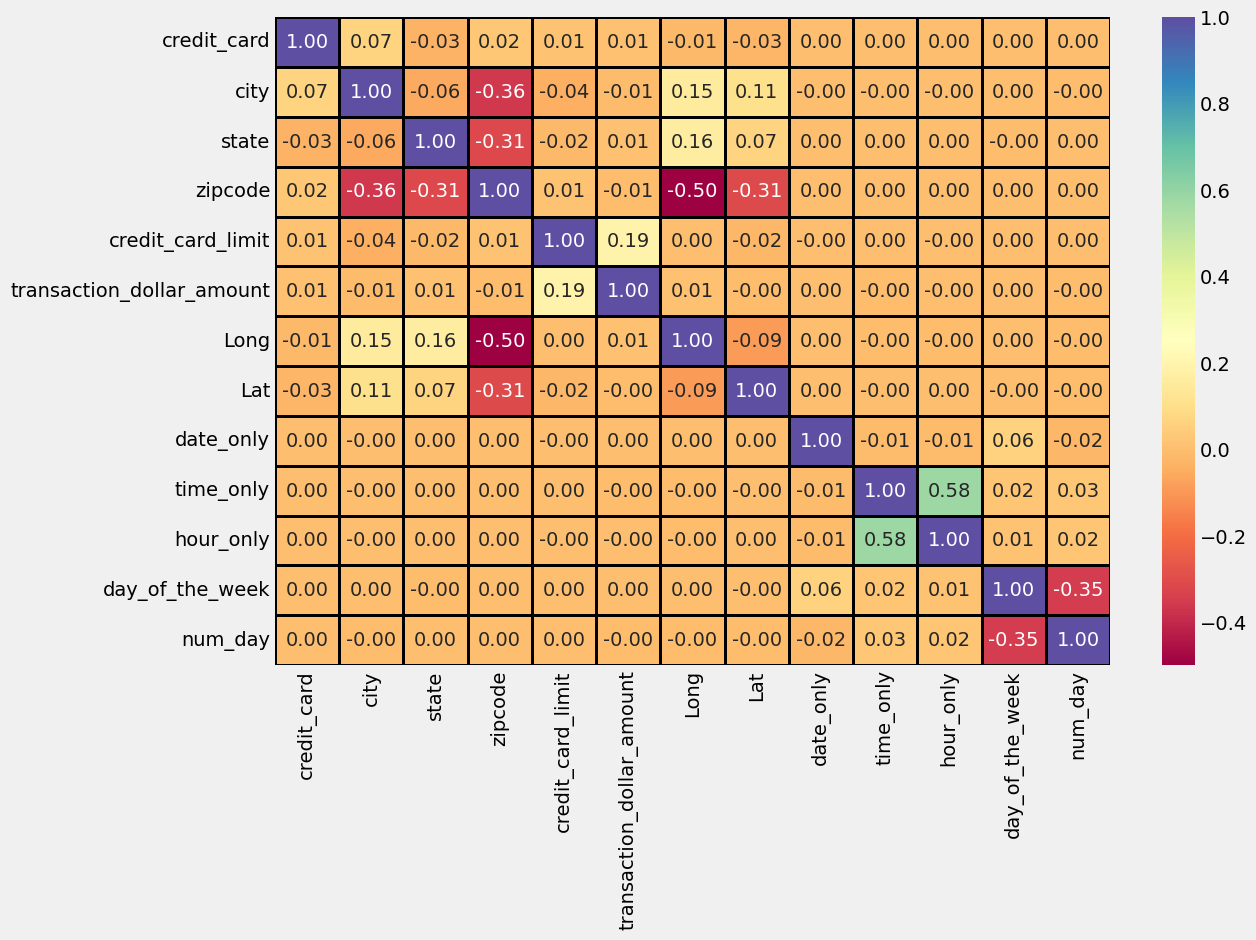

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



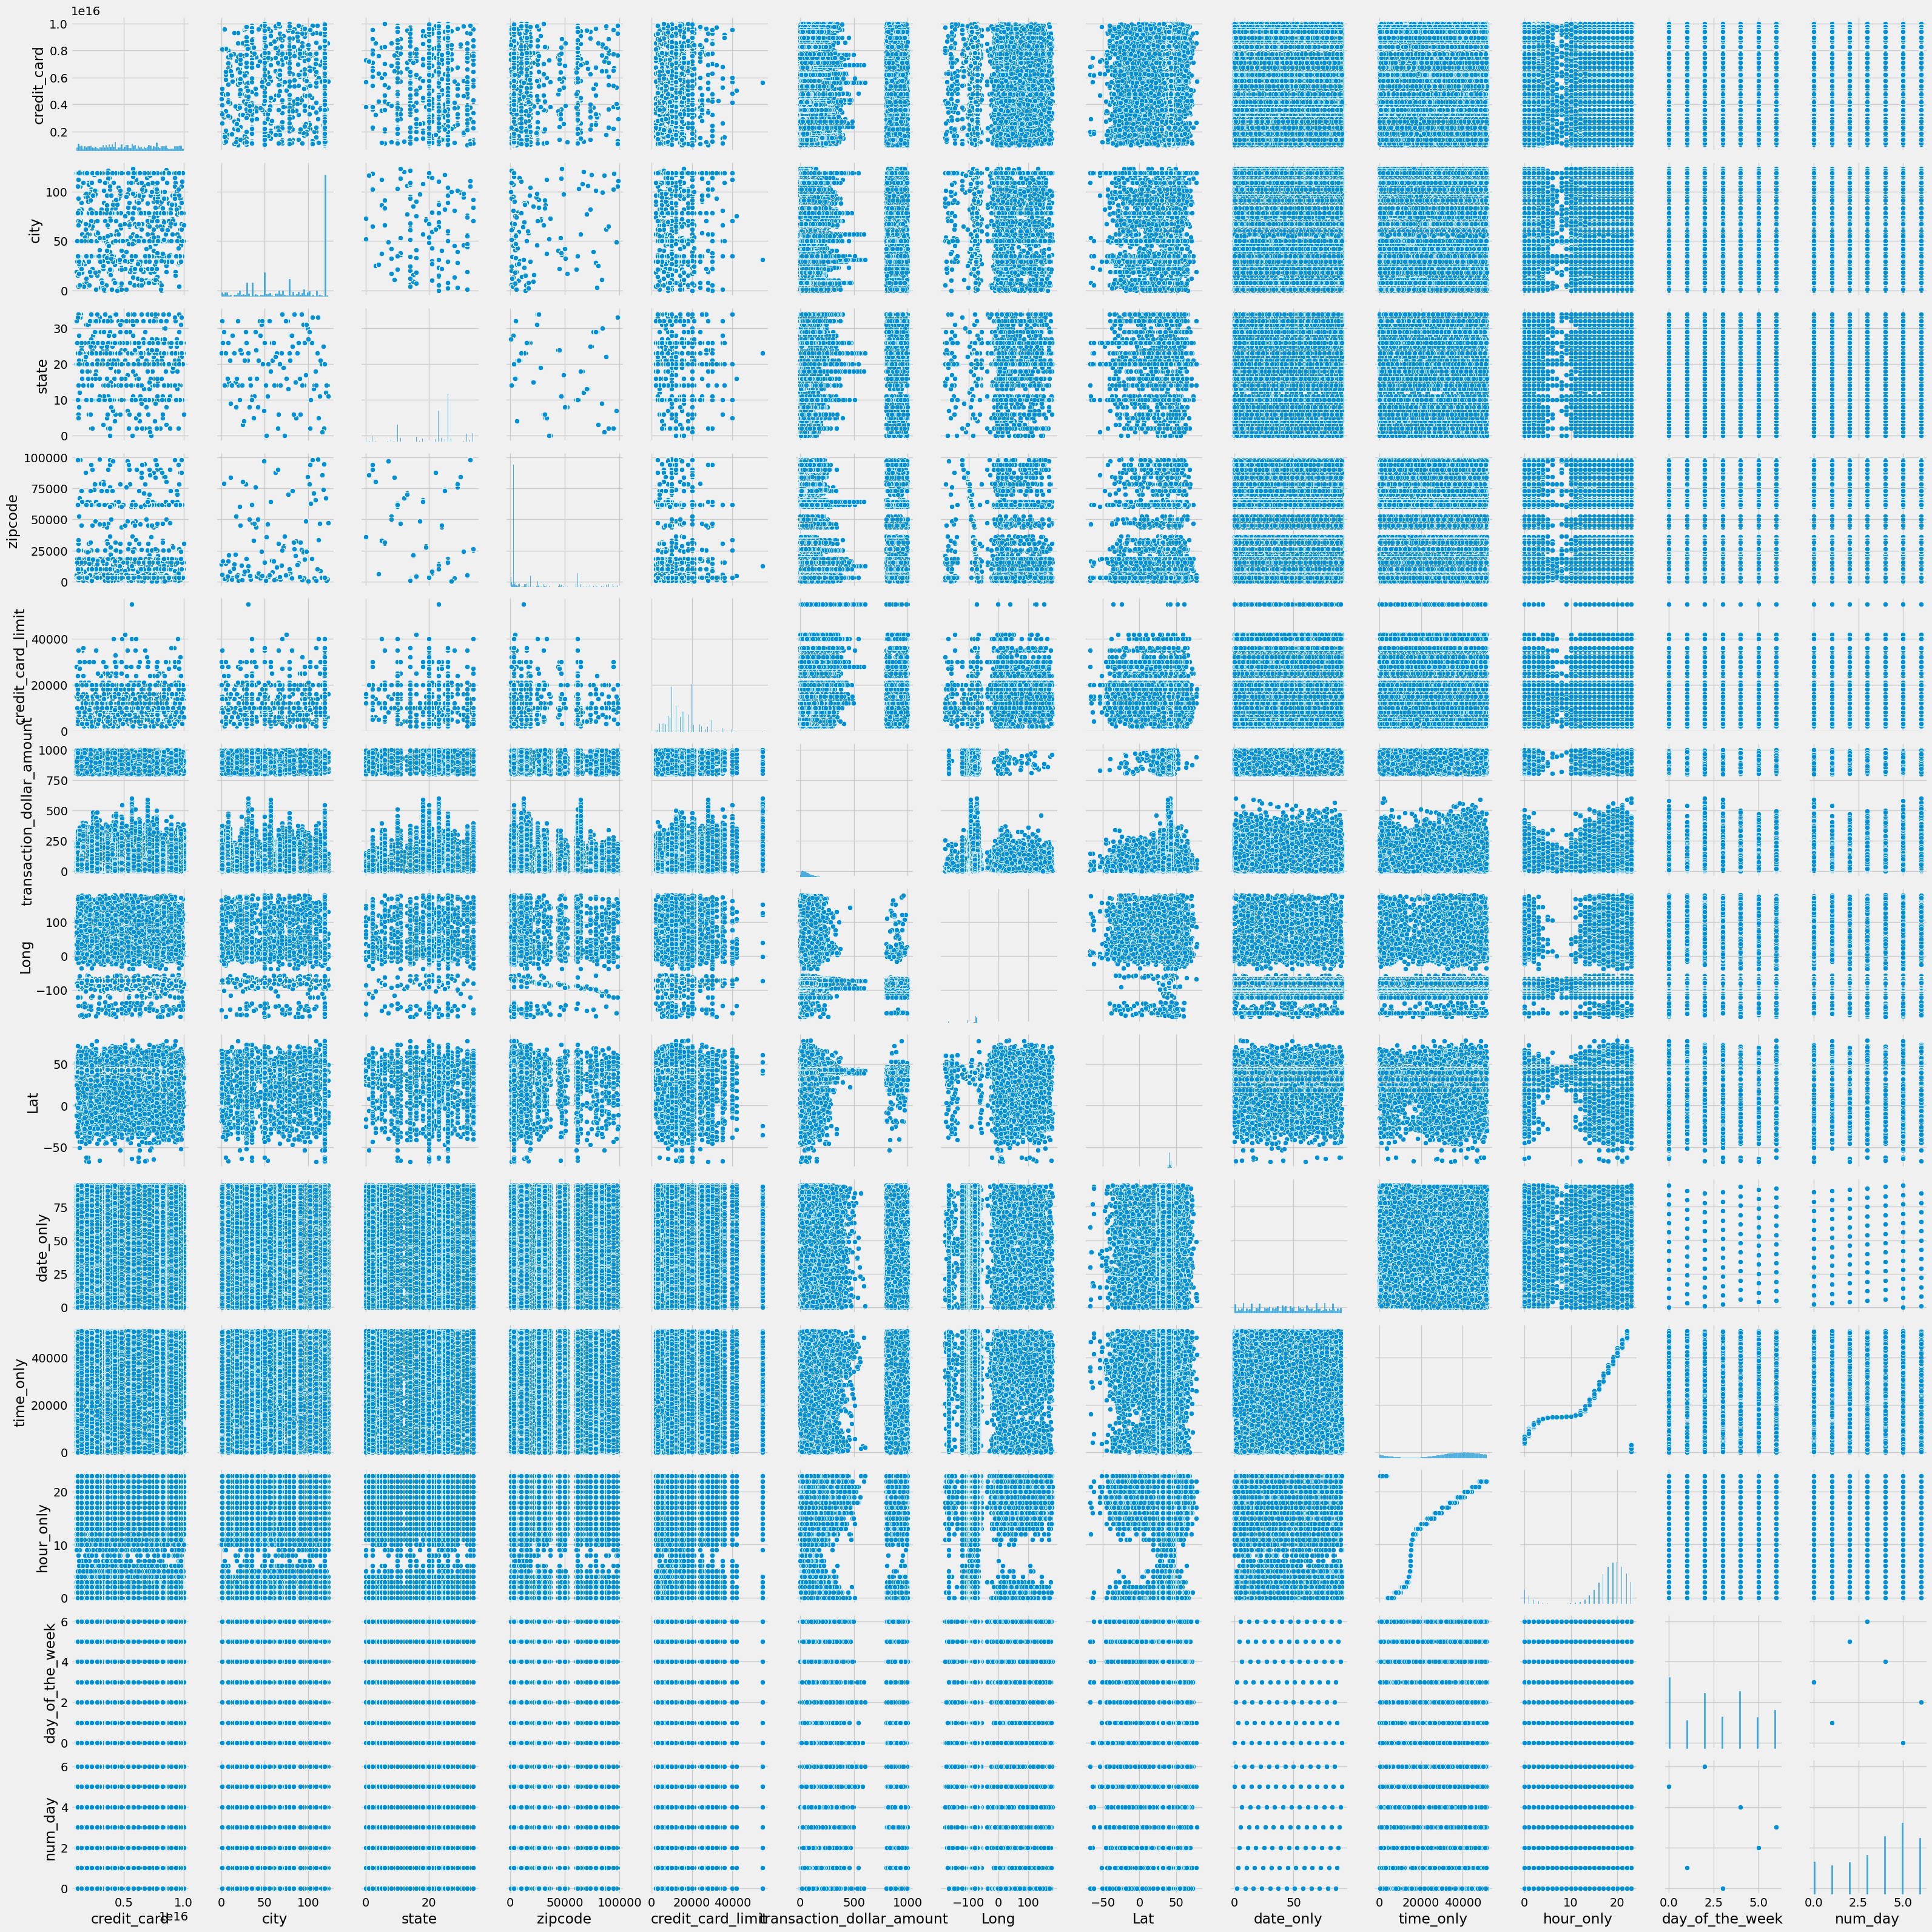

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



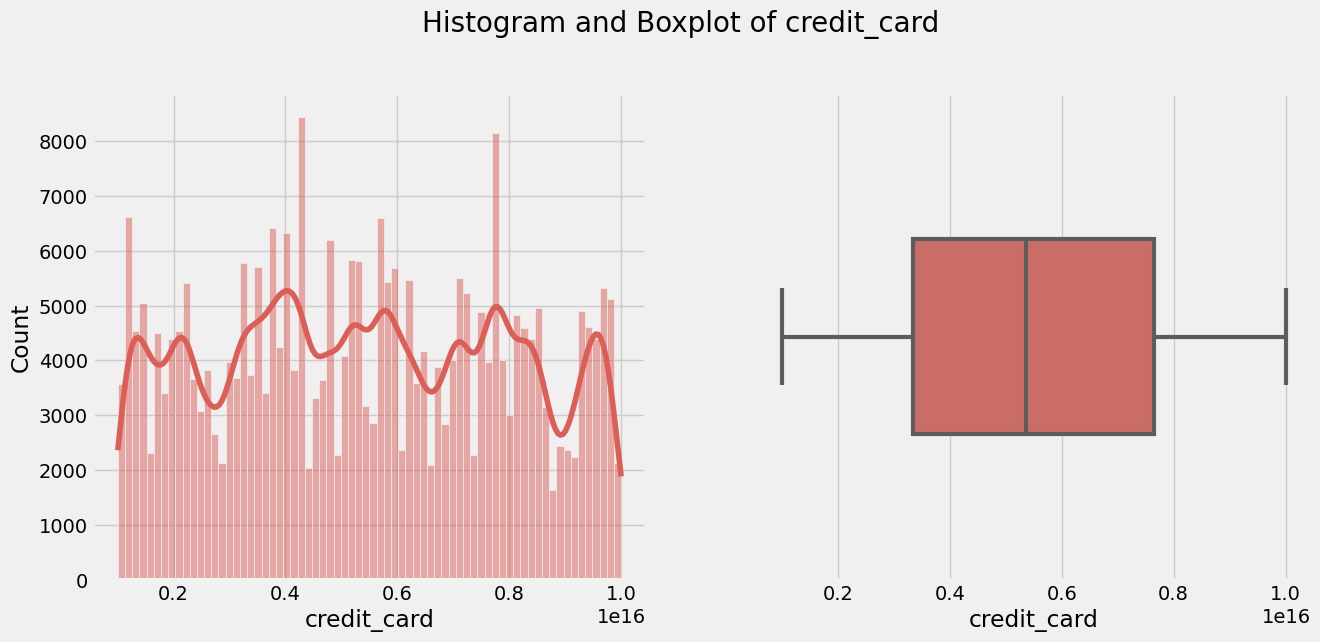

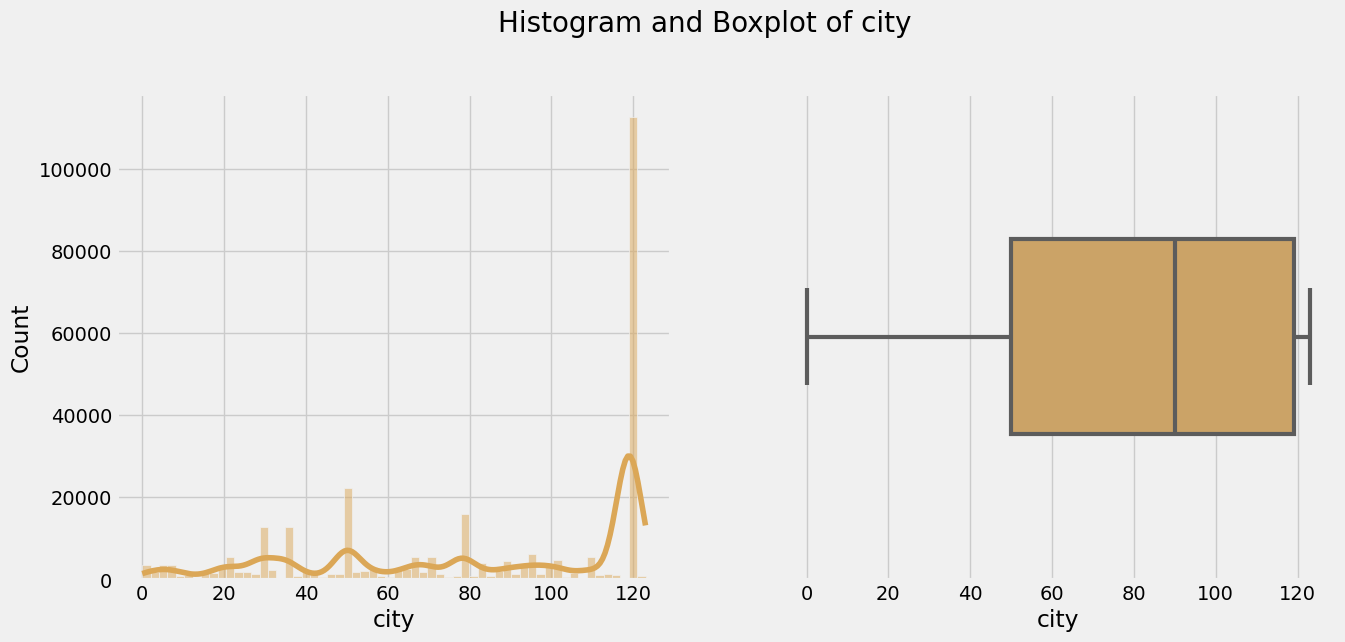

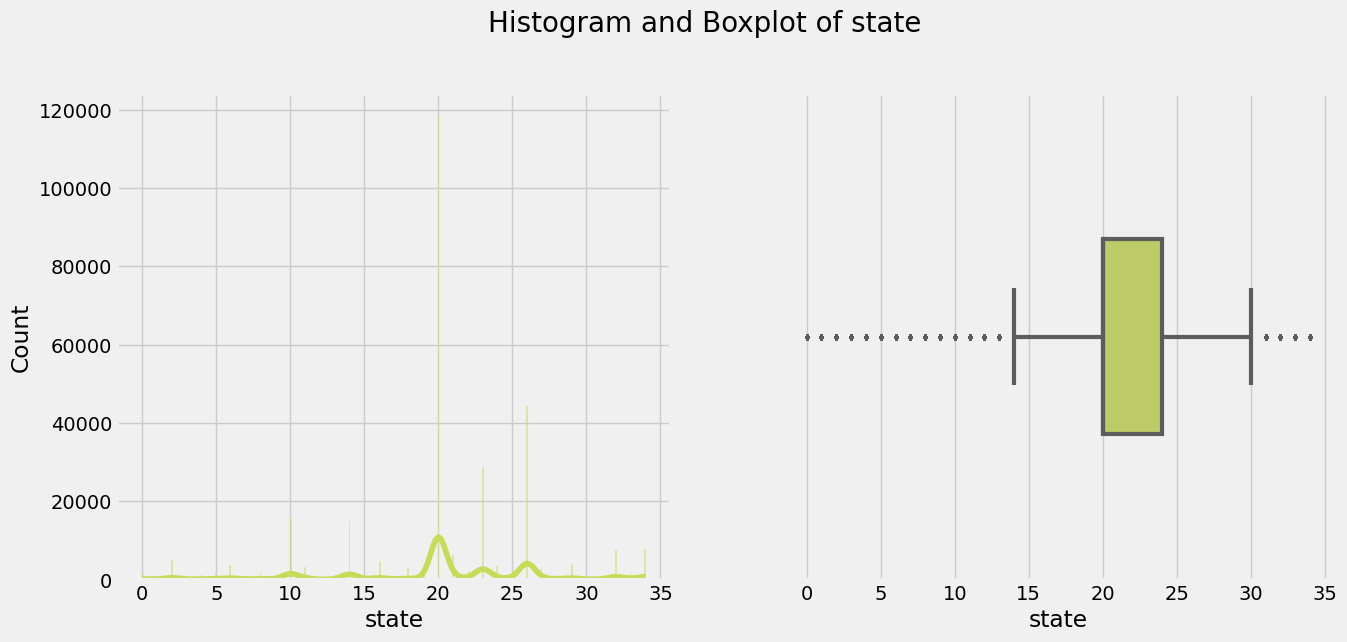

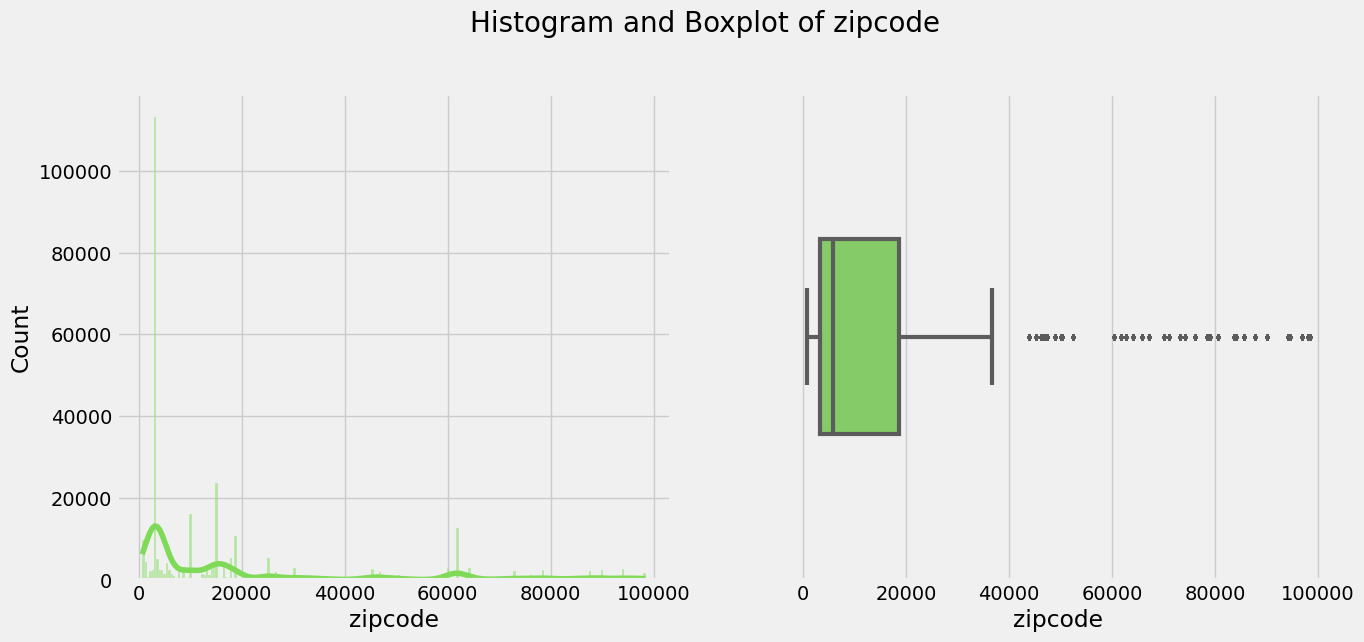

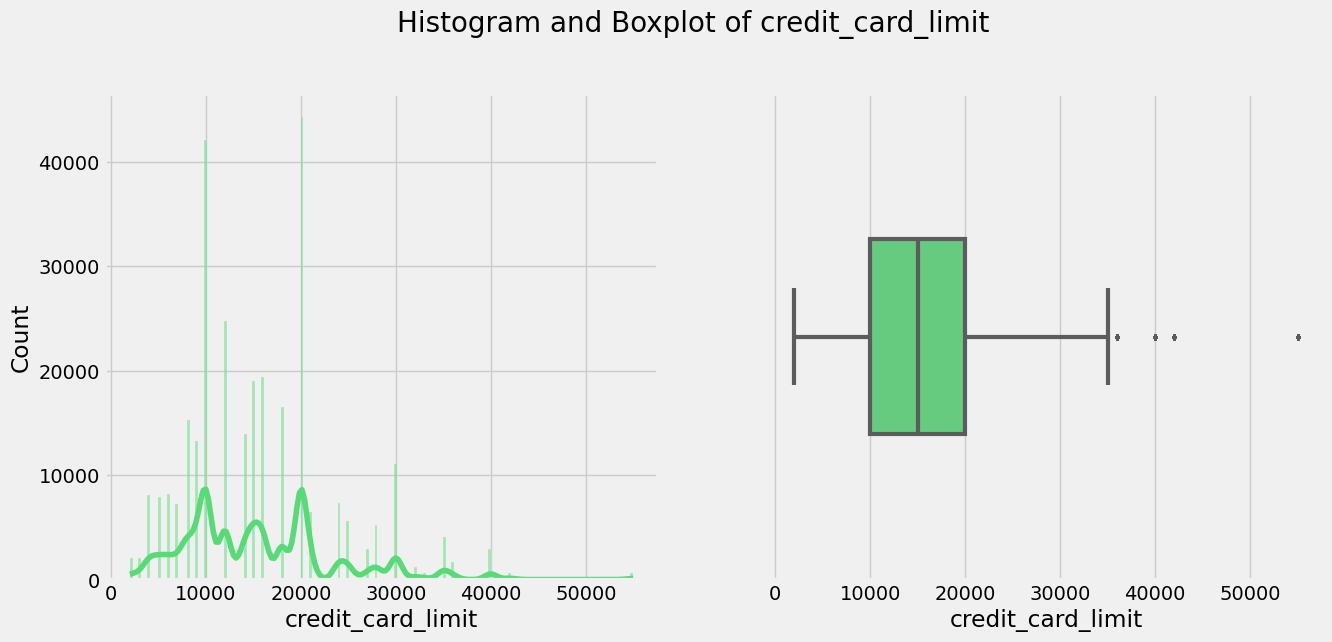

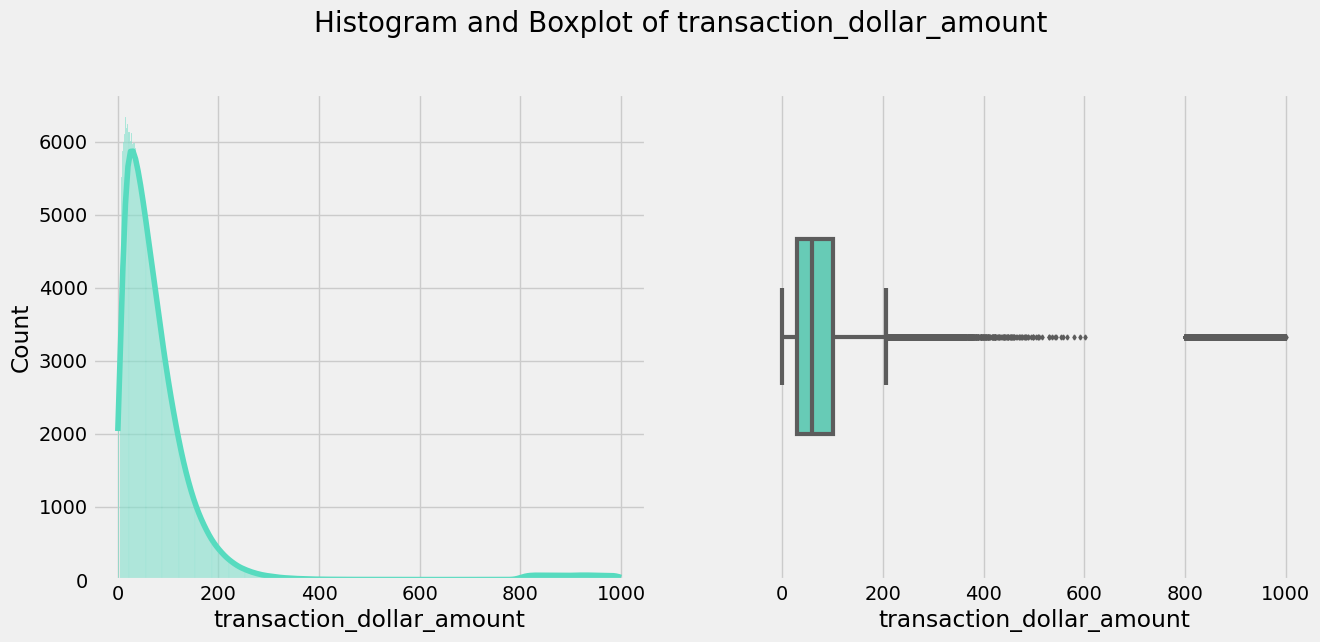

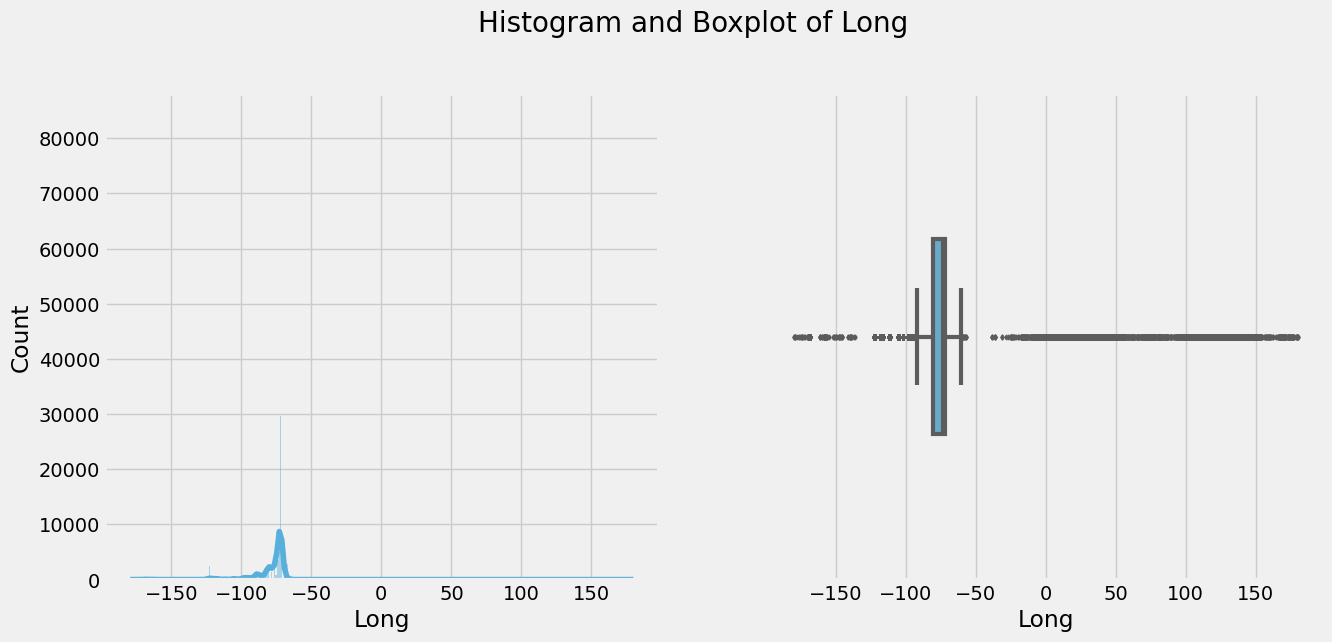

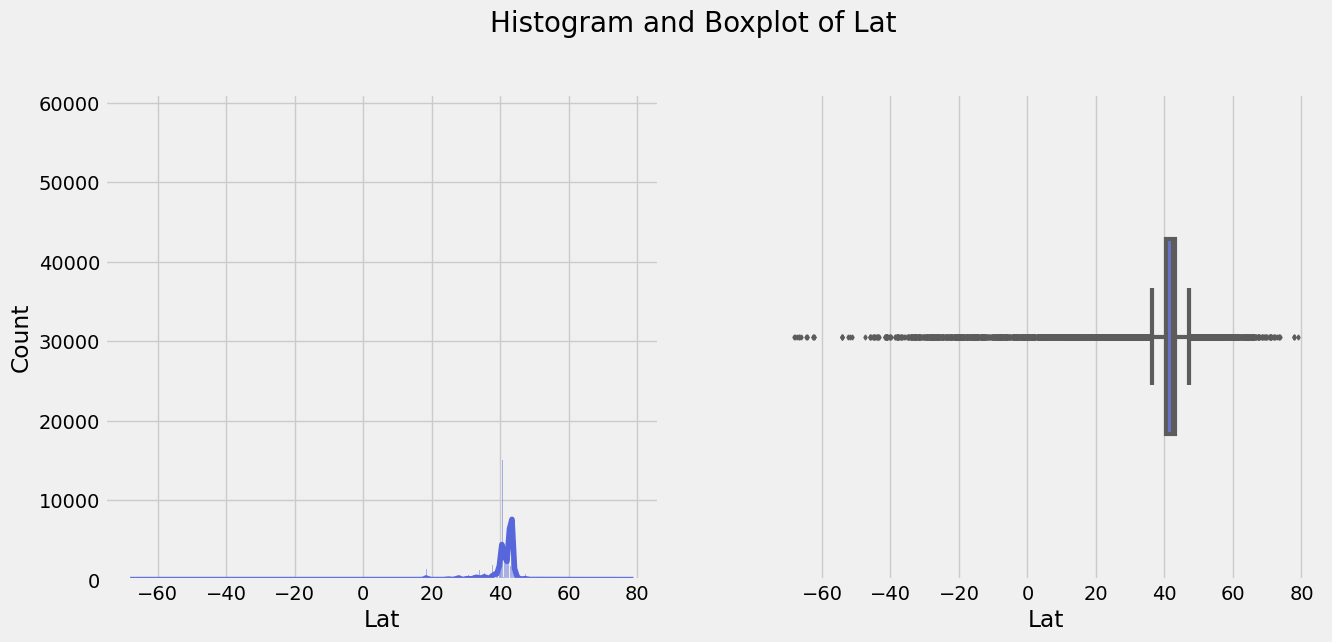

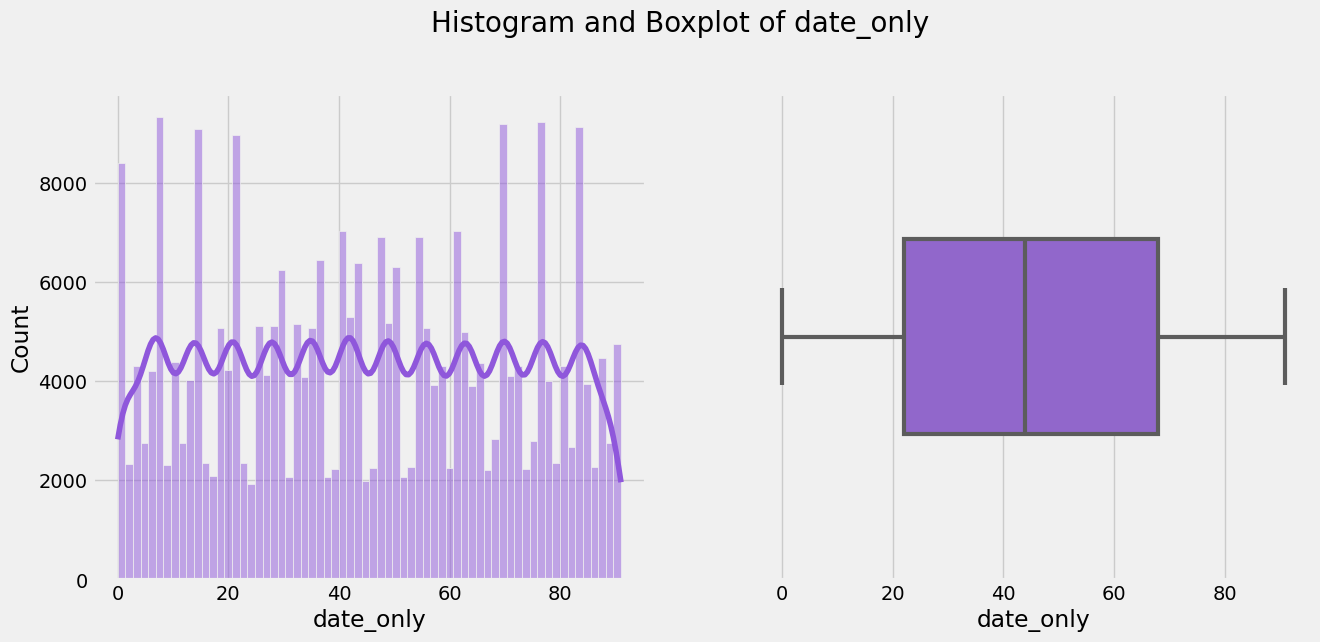

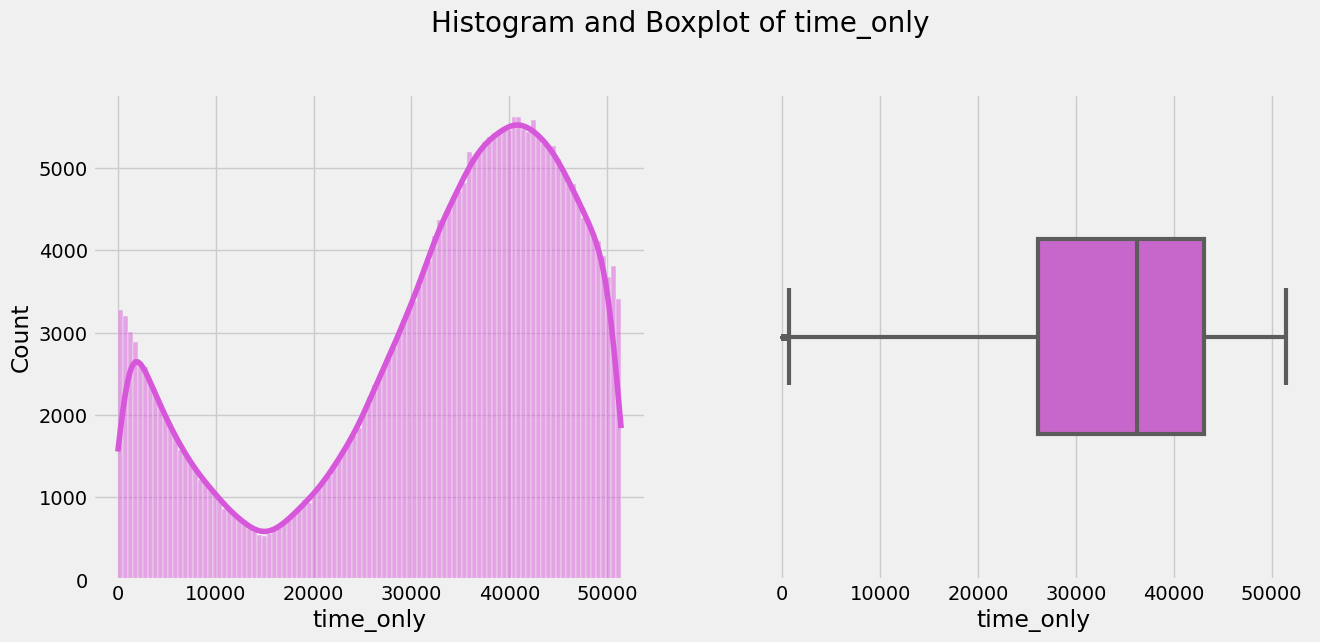

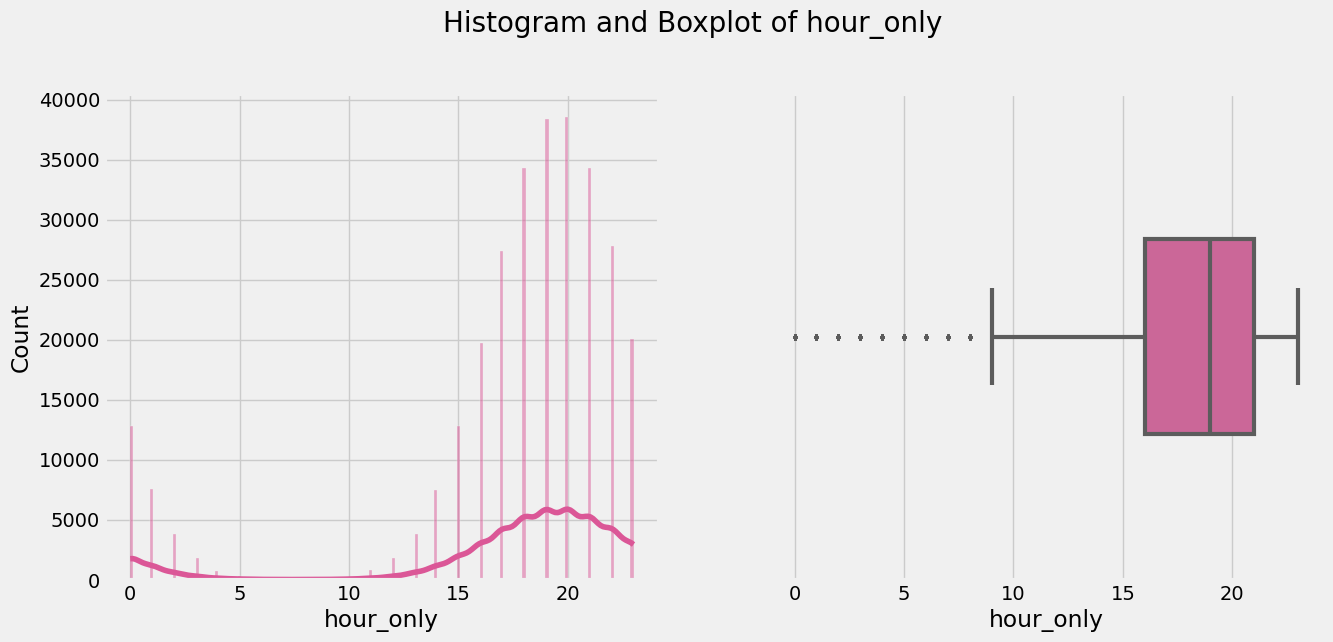

----------------------------------------------------------------------------------------------------
Countplot(s):



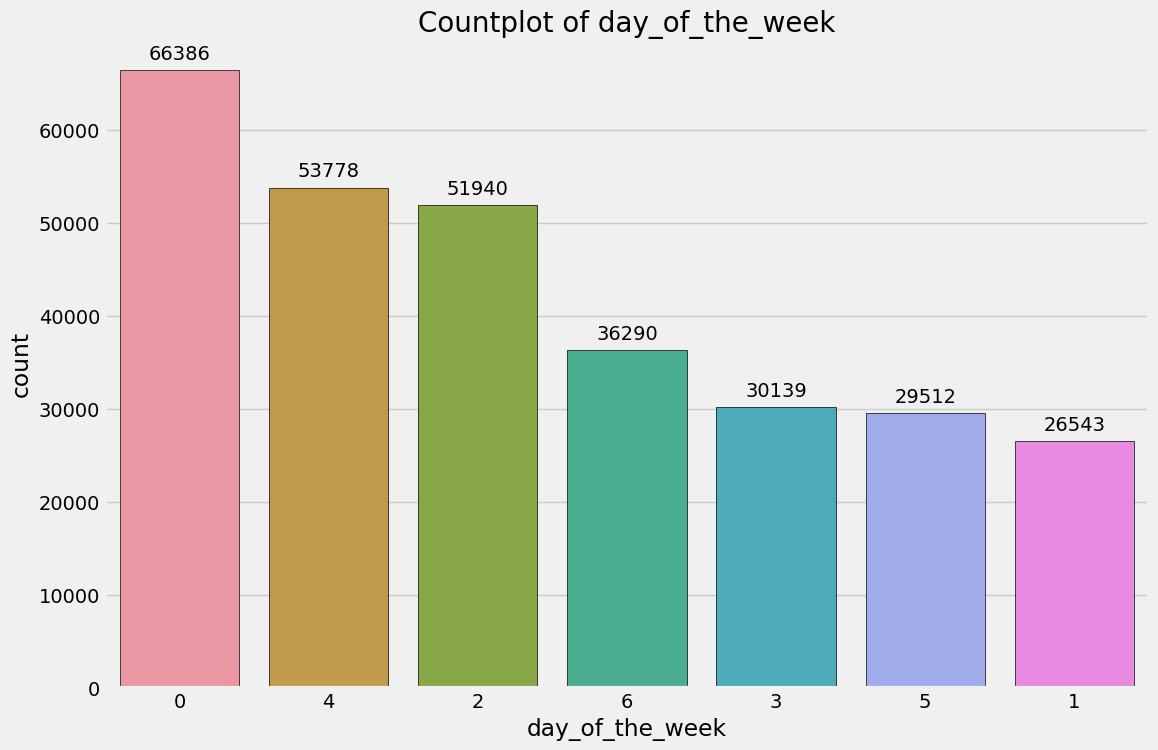

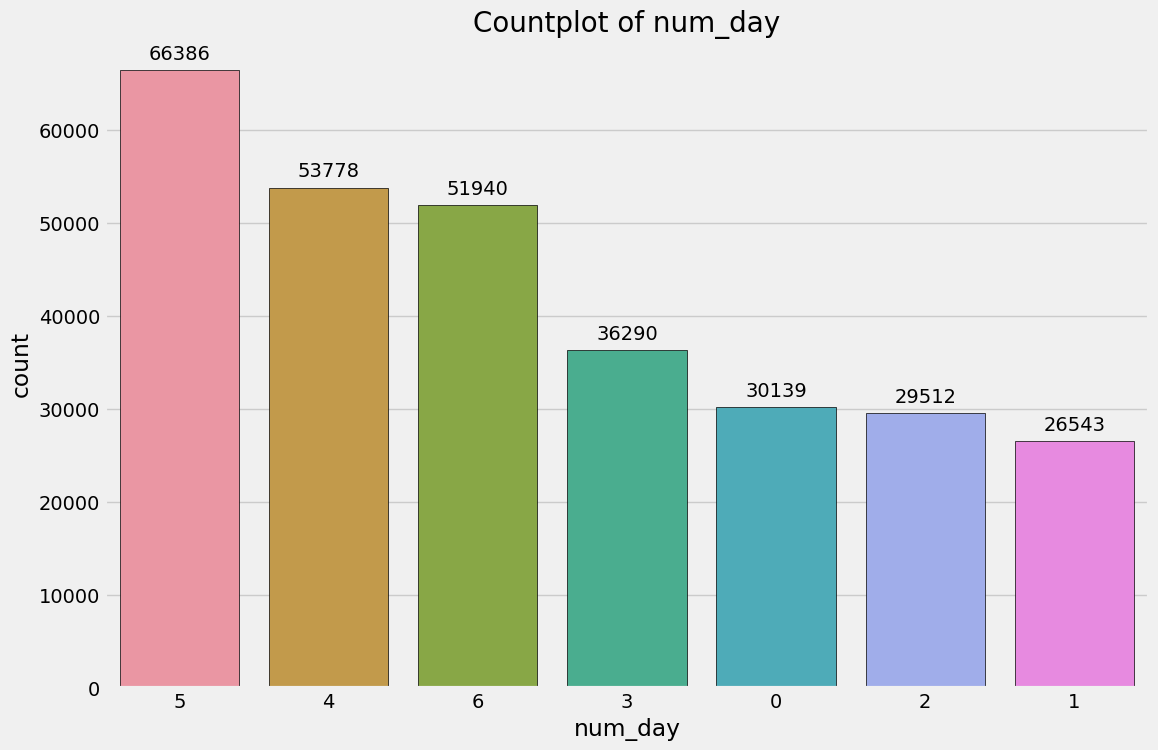

In [12]:
fast_eda(df_clean)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import pandas as pd

selected_columns = ['credit_card', 'city', 'state', 'zipcode', 'credit_card_limit']

data = df[selected_columns]

target_column = 'transaction_dollar_amount'


X = data.drop(columns=['city'])
y = data['credit_card_limit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

accuracy_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy:.2f}')

print("\nAccuracy Scores:")
for model_name, accuracy in accuracy_scores.items():
    print(f'{model_name}: {accuracy:.2f}')


Random Forest Accuracy: 1.00
Logistic Regression Accuracy: 0.15
K-Nearest Neighbors Accuracy: 1.00

Accuracy Scores:
Random Forest: 1.00
Logistic Regression: 0.15
K-Nearest Neighbors: 1.00
